In [17]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import matplotlib
import warnings

train = pd.read_csv("C:/Users/H/Desktop/평균기온예측/train.csv")
test = pd.read_csv("C:/Users/H/Desktop/평균기온예측/sample_submission.csv", encoding='cp949')

In [18]:
train

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
0,1960-01-01,2.2,-5.2,7.4,NaN,68.3,1.7,6.7,NaN,NaN,-1.6
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,NaN,NaN,-1.9
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,NaN,NaN,4.0
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,NaN,NaN,7.5
4,1960-01-05,1.3,-8.2,9.5,NaN,44.0,5.1,8.2,NaN,NaN,-4.6
...,...,...,...,...,...,...,...,...,...,...,...
23006,2022-12-27,3.3,-7.3,10.6,NaN,69.8,1.8,8.8,10.25,91.7,-2.6
23007,2022-12-28,0.1,-6.0,6.1,0.1,58.1,2.5,8.7,10.86,90.6,-3.3
23008,2022-12-29,2.1,-7.8,9.9,0.0,56.3,1.7,9.0,10.88,93.8,-2.9
23009,2022-12-30,2.3,-4.4,6.7,0.0,65.6,1.9,7.9,10.84,82.3,-1.8


In [19]:
train.describe()

,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
count,23008.000000,23008.000000,23007.000000,9150.000000,23011.000000,23007.000000,22893.000000,18149.000000,22645.000000,23011.000000
mean,17.071714,8.451960,8.619277,9.593683,65.202851,2.380993,5.858826,11.933170,48.653526,12.415419
std,10.714471,10.578285,2.907096,21.966135,14.549077,0.947595,3.816941,6.419122,31.662321,10.489515
min,-13.600000,-20.200000,1.000000,0.000000,17.900000,0.100000,0.000000,0.000000,0.000000,-16.400000
25%,7.800000,-0.300000,6.600000,0.100000,54.900000,1.700000,2.200000,7.000000,17.800000,3.400000
50%,18.900000,9.200000,8.600000,1.400000,65.500000,2.200000,6.600000,11.220000,55.700000,13.800000
75%,26.400000,17.900000,10.600000,8.500000,75.800000,2.900000,9.000000,16.620000,78.000000,21.800000
max,39.600000,30.300000,19.600000,332.800000,99.800000,7.800000,13.700000,33.480000,96.900000,33.700000


In [20]:
train['일시'] = pd.to_datetime(train['일시'])
train = train[train['일시'].dt.year >= 1987]

In [21]:
train

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
9862,1987-01-01,-0.2,-8.5,8.3,0.0,45.3,2.2,4.2,6.46,43.8,-4.2
9863,1987-01-02,2.8,-1.7,4.5,15.3,91.5,2.8,0.0,1.22,0.0,0.5
9864,1987-01-03,0.4,-7.6,8.0,NaN,62.5,3.6,7.1,10.55,74.0,-2.6
9865,1987-01-04,-1.8,-9.6,7.8,NaN,53.0,1.2,7.6,8.87,79.2,-6.2
9866,1987-01-05,0.8,-6.5,7.3,NaN,59.8,1.5,3.5,5.85,36.1,-3.1
...,...,...,...,...,...,...,...,...,...,...,...
23006,2022-12-27,3.3,-7.3,10.6,NaN,69.8,1.8,8.8,10.25,91.7,-2.6
23007,2022-12-28,0.1,-6.0,6.1,0.1,58.1,2.5,8.7,10.86,90.6,-3.3
23008,2022-12-29,2.1,-7.8,9.9,0.0,56.3,1.7,9.0,10.88,93.8,-2.9
23009,2022-12-30,2.3,-4.4,6.7,0.0,65.6,1.9,7.9,10.84,82.3,-1.8


In [22]:
train = train.set_index('일시')
train.index.freq = 'D'

In [23]:
train

,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
일시,,,,,,,,,,
1987-01-01,-0.2,-8.5,8.3,0.0,45.3,2.2,4.2,6.46,43.8,-4.2
1987-01-02,2.8,-1.7,4.5,15.3,91.5,2.8,0.0,1.22,0.0,0.5
1987-01-03,0.4,-7.6,8.0,NaN,62.5,3.6,7.1,10.55,74.0,-2.6
1987-01-04,-1.8,-9.6,7.8,NaN,53.0,1.2,7.6,8.87,79.2,-6.2
1987-01-05,0.8,-6.5,7.3,NaN,59.8,1.5,3.5,5.85,36.1,-3.1
...,...,...,...,...,...,...,...,...,...,...
2022-12-27,3.3,-7.3,10.6,NaN,69.8,1.8,8.8,10.25,91.7,-2.6
2022-12-28,0.1,-6.0,6.1,0.1,58.1,2.5,8.7,10.86,90.6,-3.3
2022-12-29,2.1,-7.8,9.9,0.0,56.3,1.7,9.0,10.88,93.8,-2.9


In [24]:
train.isnull().sum() ## 결측치 확인

최고기온       1
최저기온       1
일교차        2
강수량     8065
평균습도       0
평균풍속       3
일조합       14
일사합       30
일조율        0
평균기온       0
dtype: int64

In [25]:
train['강수량'].fillna(0.0, inplace = True)

In [26]:
train

,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
일시,,,,,,,,,,
1987-01-01,-0.2,-8.5,8.3,0.0,45.3,2.2,4.2,6.46,43.8,-4.2
1987-01-02,2.8,-1.7,4.5,15.3,91.5,2.8,0.0,1.22,0.0,0.5
1987-01-03,0.4,-7.6,8.0,0.0,62.5,3.6,7.1,10.55,74.0,-2.6
1987-01-04,-1.8,-9.6,7.8,0.0,53.0,1.2,7.6,8.87,79.2,-6.2
1987-01-05,0.8,-6.5,7.3,0.0,59.8,1.5,3.5,5.85,36.1,-3.1
...,...,...,...,...,...,...,...,...,...,...
2022-12-27,3.3,-7.3,10.6,0.0,69.8,1.8,8.8,10.25,91.7,-2.6
2022-12-28,0.1,-6.0,6.1,0.1,58.1,2.5,8.7,10.86,90.6,-3.3
2022-12-29,2.1,-7.8,9.9,0.0,56.3,1.7,9.0,10.88,93.8,-2.9


In [27]:
def na_seasplit_spline(df, column, spline_order=3):
    # 계절별로 그룹화하여 각 그룹에 대해 스플라인 보간법으로 결측치 처리
    return df.groupby('season').apply(lambda group: group[column].interpolate(method='spline', order=spline_order))

In [28]:
train.isnull().sum() ## 결측치 확인

최고기온     1
최저기온     1
일교차      2
강수량      0
평균습도     0
평균풍속     3
일조합     14
일사합     30
일조율      0
평균기온     0
dtype: int64

In [29]:
train['일교차'][train['일교차'].isnull()]

일시
2017-10-12   NaN
2022-08-08   NaN
Name: 일교차, dtype: float64

In [30]:
train.index = pd.to_datetime(train.index)

train.loc['2017-10-12', '일교차'] = np.nan
train.loc['2022-08-08', '일교차'] = np.nan

# '일교차' 열에 스플라인 보간법 적용
train['일교차'] = train['일교차'].interpolate(method='spline', order=3)

In [31]:
train['최고기온'][train['최고기온'].isnull()]

일시
2017-10-12   NaN
Freq: D, Name: 최고기온, dtype: float64

In [32]:
train.loc['2017-10-12','최고기온'] = np.nan

# '최고기온' 열에 스플라인 보간법 적용
train['최고기온'] = train['최고기온'].interpolate(method='spline', order=3)

In [33]:
train['최저기온'][train['최저기온'].isnull()]

일시
2022-08-08   NaN
Freq: D, Name: 최저기온, dtype: float64

In [34]:
train.loc['2022-08-08','최저기온'] = np.nan

# '최고기온' 열에 스플라인 보간법 적용
train['최저기온'] = train['최저기온'].interpolate(method='spline', order=3)

In [35]:
train['평균풍속'][train['평균풍속'].isnull()]

일시
2017-10-14   NaN
2017-12-05   NaN
2017-12-06   NaN
Name: 평균풍속, dtype: float64

In [36]:
train.loc['2017-10-14','평균풍속'] = np.nan
train.loc['2017-12-05','평균풍속'] = np.nan
train.loc['2017-12-06','평균풍속'] = np.nan

# '평균풍속' 열에 스플라인 보간법 적용
train['평균풍속'] = train['평균풍속'].interpolate(method='spline', order=3)
train['평균풍속'] = train['평균풍속'].interpolate(method='spline', order=3)
train['평균풍속'] = train['평균풍속'].interpolate(method='spline', order=3)

In [37]:
row = train.loc['2017-12-06']

In [38]:
row2 = train.loc['2017-10-12']

In [39]:
row

최고기온     6.000000
최저기온    -4.500000
일교차     10.500000
강수량      1.200000
평균습도    72.600000
평균풍속     2.398328
일조합      7.700000
일사합      6.140000
일조율     79.400000
평균기온     0.200000
Name: 2017-12-06 00:00:00, dtype: float64

In [40]:
row2

최고기온    19.604541
최저기온     8.800000
일교차     10.209299
강수량      0.000000
평균습도    71.000000
평균풍속     2.000000
일조합           NaN
일사합      2.230000
일조율      0.000000
평균기온    11.400000
Name: 2017-10-12 00:00:00, dtype: float64

In [41]:
train['일사합']

일시
1987-01-01     6.46
1987-01-02     1.22
1987-01-03    10.55
1987-01-04     8.87
1987-01-05     5.85
              ...  
2022-12-27    10.25
2022-12-28    10.86
2022-12-29    10.88
2022-12-30    10.84
2022-12-31     4.16
Freq: D, Name: 일사합, Length: 13149, dtype: float64

In [42]:
train['일사합'][train['일사합'].isnull()]

일시
1987-09-23   NaN
1987-09-24   NaN
2005-10-05   NaN
2005-12-12   NaN
2011-10-12   NaN
2014-07-12   NaN
2014-07-13   NaN
2014-07-14   NaN
2014-07-15   NaN
2014-07-16   NaN
2014-07-17   NaN
2014-07-18   NaN
2014-07-19   NaN
2014-07-20   NaN
2014-07-21   NaN
2014-07-22   NaN
2015-06-04   NaN
2017-04-16   NaN
2017-04-25   NaN
2017-11-05   NaN
2017-11-20   NaN
2017-11-27   NaN
2017-11-30   NaN
2018-01-18   NaN
2018-01-26   NaN
2018-02-15   NaN
2019-08-28   NaN
2019-08-29   NaN
2021-01-07   NaN
2022-08-08   NaN
Name: 일사합, dtype: float64

In [43]:
train['강수량'][train['강수량'].isnull()]

Series([], Freq: D, Name: 강수량, dtype: float64)

In [44]:
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

# 인덱스(날짜)를 이용하여 계절 정보 추가
train['season'] = train.index.month.map(get_season)

# 계절별 결측치 처리 함수
def na_seasplit(df, column):
    # 계절별로 그룹화하여 각 그룹에 대해 결측치 처리
    return df.groupby('season')[column].transform(lambda x: x.fillna(x.mean()))

# 각 열에 대해 결측치 처리
for column in ['일조합', '일사합']:
    train[column] = na_seasplit(train, column)

## 계절에 따른 보간법

In [114]:
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

# 인덱스(날짜)를 이용하여 계절 정보 추가
train['season'] = train.index.month.map(get_season)

# 계절별 결측치 처리 함수
def na_seasplit(df, column):
    # 계절별로 그룹화하여 각 그룹에 대해 결측치 처리
    return df.groupby('season')[column].transform(lambda x: x.fillna(x.mean()))

# 각 열에 대해 결측치 처리
for column in ['일조합', '일사합']:
    train[column] = na_seasplit(train, column)

In [45]:
train

,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온,season
일시,,,,,,,,,,,
1987-01-01,-0.2,-8.5,8.3,0.0,45.3,2.2,4.2,6.46,43.8,-4.2,Winter
1987-01-02,2.8,-1.7,4.5,15.3,91.5,2.8,0.0,1.22,0.0,0.5,Winter
1987-01-03,0.4,-7.6,8.0,0.0,62.5,3.6,7.1,10.55,74.0,-2.6,Winter
1987-01-04,-1.8,-9.6,7.8,0.0,53.0,1.2,7.6,8.87,79.2,-6.2,Winter
1987-01-05,0.8,-6.5,7.3,0.0,59.8,1.5,3.5,5.85,36.1,-3.1,Winter
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,3.3,-7.3,10.6,0.0,69.8,1.8,8.8,10.25,91.7,-2.6,Winter
2022-12-28,0.1,-6.0,6.1,0.1,58.1,2.5,8.7,10.86,90.6,-3.3,Winter
2022-12-29,2.1,-7.8,9.9,0.0,56.3,1.7,9.0,10.88,93.8,-2.9,Winter


In [46]:
season = { 'Spring' : 1,
         'Summer' : 2,
         'Fall' : 3,
         'Winter' : 4}
train['계절숫자'] = train['season'].replace(season)

In [47]:
train

,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온,season,계절숫자
일시,,,,,,,,,,,,
1987-01-01,-0.2,-8.5,8.3,0.0,45.3,2.2,4.2,6.46,43.8,-4.2,Winter,4
1987-01-02,2.8,-1.7,4.5,15.3,91.5,2.8,0.0,1.22,0.0,0.5,Winter,4
1987-01-03,0.4,-7.6,8.0,0.0,62.5,3.6,7.1,10.55,74.0,-2.6,Winter,4
1987-01-04,-1.8,-9.6,7.8,0.0,53.0,1.2,7.6,8.87,79.2,-6.2,Winter,4
1987-01-05,0.8,-6.5,7.3,0.0,59.8,1.5,3.5,5.85,36.1,-3.1,Winter,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,3.3,-7.3,10.6,0.0,69.8,1.8,8.8,10.25,91.7,-2.6,Winter,4
2022-12-28,0.1,-6.0,6.1,0.1,58.1,2.5,8.7,10.86,90.6,-3.3,Winter,4
2022-12-29,2.1,-7.8,9.9,0.0,56.3,1.7,9.0,10.88,93.8,-2.9,Winter,4


In [48]:
train = train.drop(columns=['season'])

In [49]:
train.isnull().sum()

최고기온    0
최저기온    0
일교차     0
강수량     0
평균습도    0
평균풍속    0
일조합     0
일사합     0
일조율     0
평균기온    0
계절숫자    0
dtype: int64

In [50]:
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:] ## 여기가 한글로 나타내 수 있어요

['C:\\Windows\\Fonts\\simsunb.ttf',
 'C:\\Windows\\Fonts\\swmeteo.ttf',
 'C:\\Windows\\Fonts\\ARIALN.TTF',
 'C:\\Windows\\Fonts\\GOTHIC.TTF',
 'C:\\Windows\\Fonts\\Phetsarath OT.ttf',
 'C:\\Windows\\Fonts\\comicbd.ttf',
 'C:\\Windows\\Fonts\\SegoeIcons.ttf',
 'C:\\Windows\\Fonts\\georgiaz.ttf',
 'C:\\Windows\\Fonts\\HANBatangExt.ttf',
 'C:\\Windows\\Fonts\\swisop3.ttf',
 'C:\\Windows\\Fonts\\segoeuib.ttf',
 'C:\\Windows\\Fonts\\H2PORM.TTF',
 'C:\\Windows\\Fonts\\GOTHICB.TTF',
 'C:\\Windows\\Fonts\\Hancom Gothic Bold.ttf',
 'C:\\Windows\\Fonts\\constanz.ttf',
 'C:\\Program Files\\SOLIDWORKS Corp\\SOLIDWORKS\\HoopsPublish\\resource\\Font\\AdobeArabic-Bold.otf',
 'C:\\Program Files\\SOLIDWORKS Corp\\SOLIDWORKS\\HoopsPublish\\resource\\Font\\AdobeArabic-BoldItalic.otf',
 'C:\\Windows\\Fonts\\swital.ttf',
 'C:\\Windows\\Fonts\\framd.ttf',
 'C:\\Program Files\\SOLIDWORKS Corp\\SOLIDWORKS\\HoopsPublish\\resource\\Font\\adobemingstd-light.otf',
 'C:\\Program Files\\SOLIDWORKS Corp\\SOLIDWORKS\

In [51]:
from matplotlib import font_manager, rc

font_location = 'C:/Windows/Fonts/HANDotum.ttf' # For Windows
font = font_manager.FontProperties(fname=font_location).get_name()
rc('font', family=font)

<Figure size 100x300 with 0 Axes>

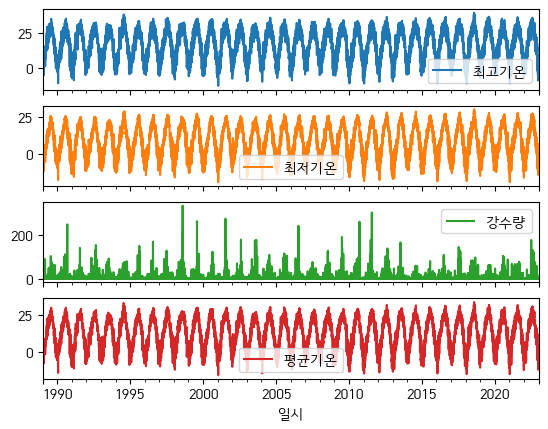

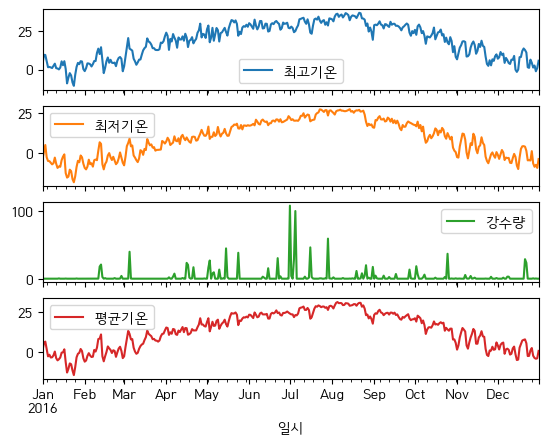

In [63]:
plt.figure(figsize = (1,3))
plot_cols = ['최고기온', '최저기온', '강수량', '평균기온']
plot_features = train[plot_cols]
plot_features.index = train.index
_ = plot_features.plot(subplots = True)

# 2000년 월별 추이(1972~2022년 중 중간 년도 선택)
plot_features = train[plot_cols][9861:10227]
plot_features.index = train.index[9861:10227]
_ = plot_features.plot(subplots=True)

In [52]:
train = train.astype({'강수량' : 'float64'})

In [53]:
train['강수량']

일시
1987-01-01     0.0
1987-01-02    15.3
1987-01-03     0.0
1987-01-04     0.0
1987-01-05     0.0
              ... 
2022-12-27     0.0
2022-12-28     0.1
2022-12-29     0.0
2022-12-30     0.0
2022-12-31     0.0
Freq: D, Name: 강수량, Length: 13149, dtype: float64

<Figure size 100x100 with 0 Axes>

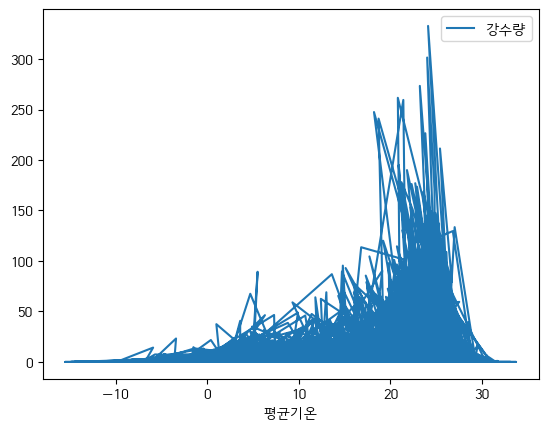

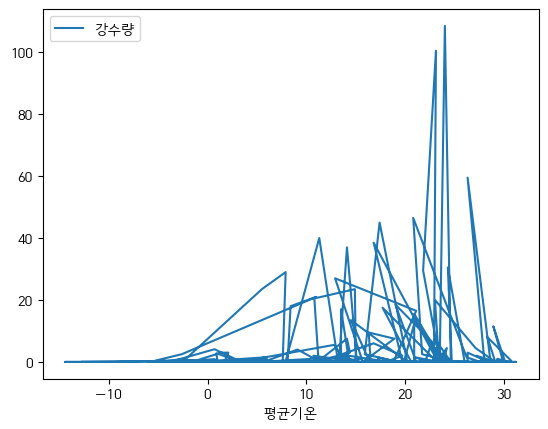

In [69]:
plt.figure(figsize = (1,1))
plot_cols = ['강수량']
plot_features = train[plot_cols]
plot_features.index = train['평균기온']
_ = plot_features.plot(subplots = True)

# 2000년 월별 추이(1972~2022년 중 중간 년도 선택)
plot_features = train[plot_cols][9861:10227]
plot_features.index = train['평균기온'][9861:10227]
_ = plot_features.plot(subplots=True)

In [71]:
train

,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온,계절숫자
일시,,,,,,,,,,,
1989-01-01,3.5,-3.4,6.9,0.0,64.5,2.1,7.8,8.57,81.3,-0.6,4
1989-01-02,2.9,-4.0,6.9,0.0,83.8,1.6,0.0,1.82,0.0,-0.5,4
1989-01-03,2.9,-4.1,7.0,0.0,61.8,3.0,7.7,7.89,80.2,0.0,4
1989-01-04,1.5,-7.2,8.7,0.0,45.0,1.5,8.1,7.17,83.5,-2.9,4
1989-01-05,6.3,-7.6,13.9,0.0,43.5,1.3,7.3,8.00,75.3,-1.3,4
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,3.3,-7.3,10.6,0.0,69.8,1.8,8.8,10.25,91.7,-2.6,4
2022-12-28,0.1,-6.0,6.1,0.1,58.1,2.5,8.7,10.86,90.6,-3.3,4
2022-12-29,2.1,-7.8,9.9,0.0,56.3,1.7,9.0,10.88,93.8,-2.9,4


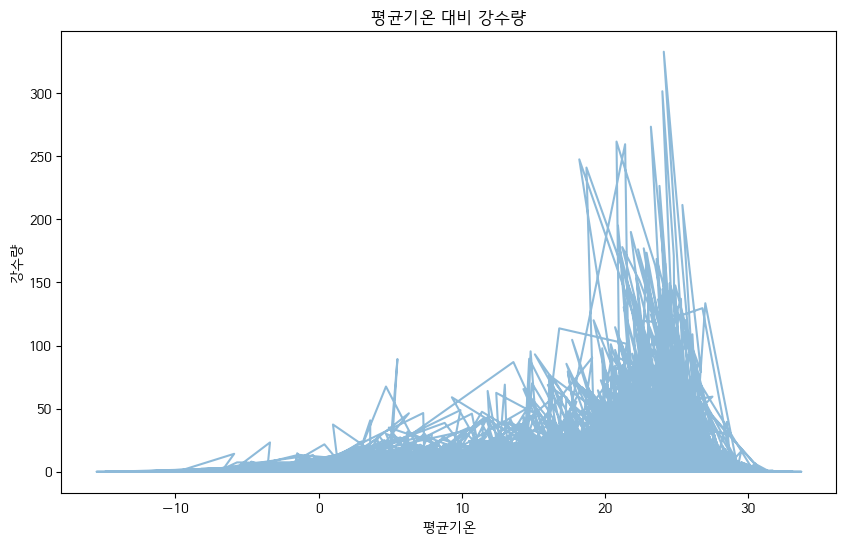

In [68]:
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.plot(train['평균기온'], train['강수량'], alpha=0.5)  # 산점도로 표시
plt.xlabel('평균기온')  # x축 레이블
plt.ylabel('강수량')  # y축 레이블
plt.title('평균기온 대비 강수량')  # 그래프 제목

# 그래프 보여주기
plt.show()

In [54]:
train.corr()

,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온,계절숫자
최고기온,1.000000,0.962532,0.177345,0.125134,0.327811,-0.213669,0.068754,0.438878,-0.123289,0.989619,-0.531710
최저기온,0.962532,1.000000,-0.096170,0.208507,0.473724,-0.171857,-0.117740,0.275778,-0.298168,0.989207,-0.492055
일교차,0.177345,-0.096170,1.000000,-0.297297,-0.516002,-0.160563,0.679706,0.610130,0.629609,0.042432,-0.165924
강수량,0.125134,0.208507,-0.297297,1.000000,0.393740,0.045883,-0.326681,-0.280769,-0.333888,0.169459,-0.084518
평균습도,0.327811,0.473724,-0.516002,0.393740,1.000000,-0.114397,-0.613450,-0.432130,-0.657567,0.404192,-0.065209
평균풍속,-0.213669,-0.171857,-0.160563,0.045883,-0.114397,1.000000,0.060141,0.049602,0.060829,-0.196656,-0.118771
일조합,0.068754,-0.117740,0.679706,-0.326681,-0.613450,0.060141,1.000000,0.789486,0.964424,-0.028633,-0.086715
일사합,0.438878,0.275778,0.610130,-0.280769,-0.432130,0.049602,0.789486,1.000000,0.636205,0.357903,-0.450318
일조율,-0.123289,-0.298168,0.629609,-0.333888,-0.657567,0.060829,0.964424,0.636205,1.000000,-0.217540,0.088102
평균기온,0.989619,0.989207,0.042432,0.169459,0.404192,-0.196656,-0.028633,0.357903,-0.217540,1.000000,-0.515610


<Axes: >

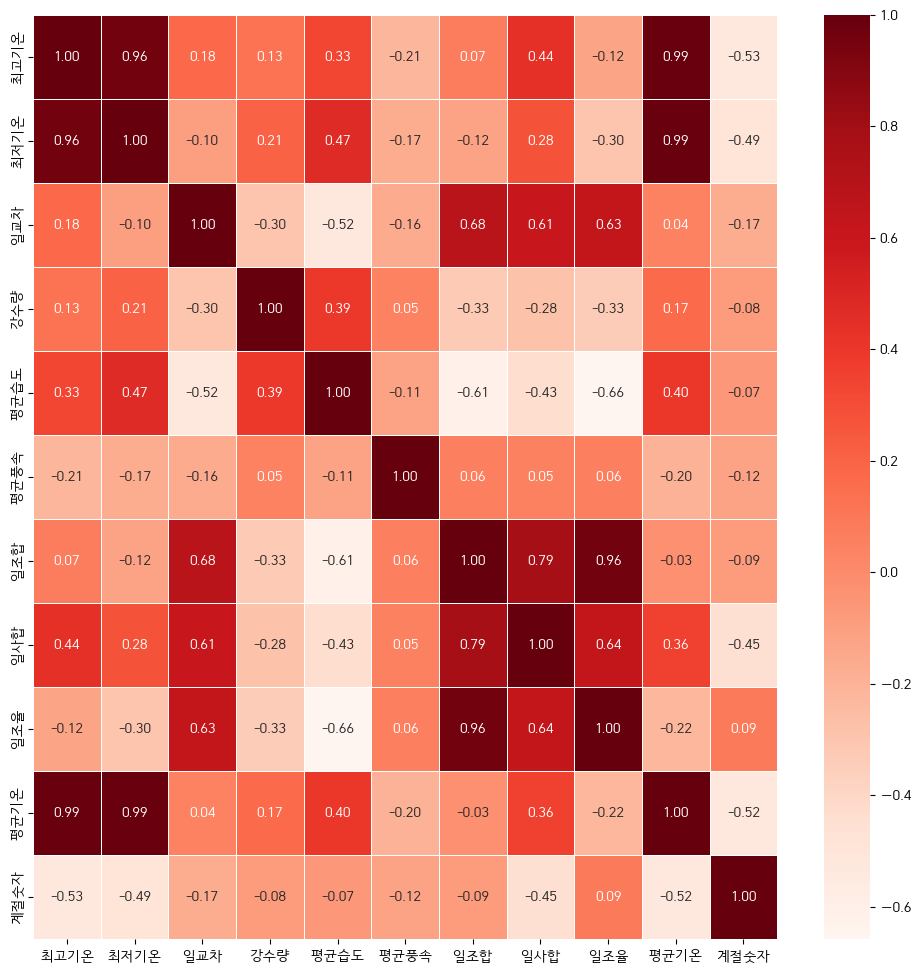

In [55]:
plt.figure(figsize=(12,12))
sns.heatmap(data = train.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Reds')

## 이상치 한번에 확인

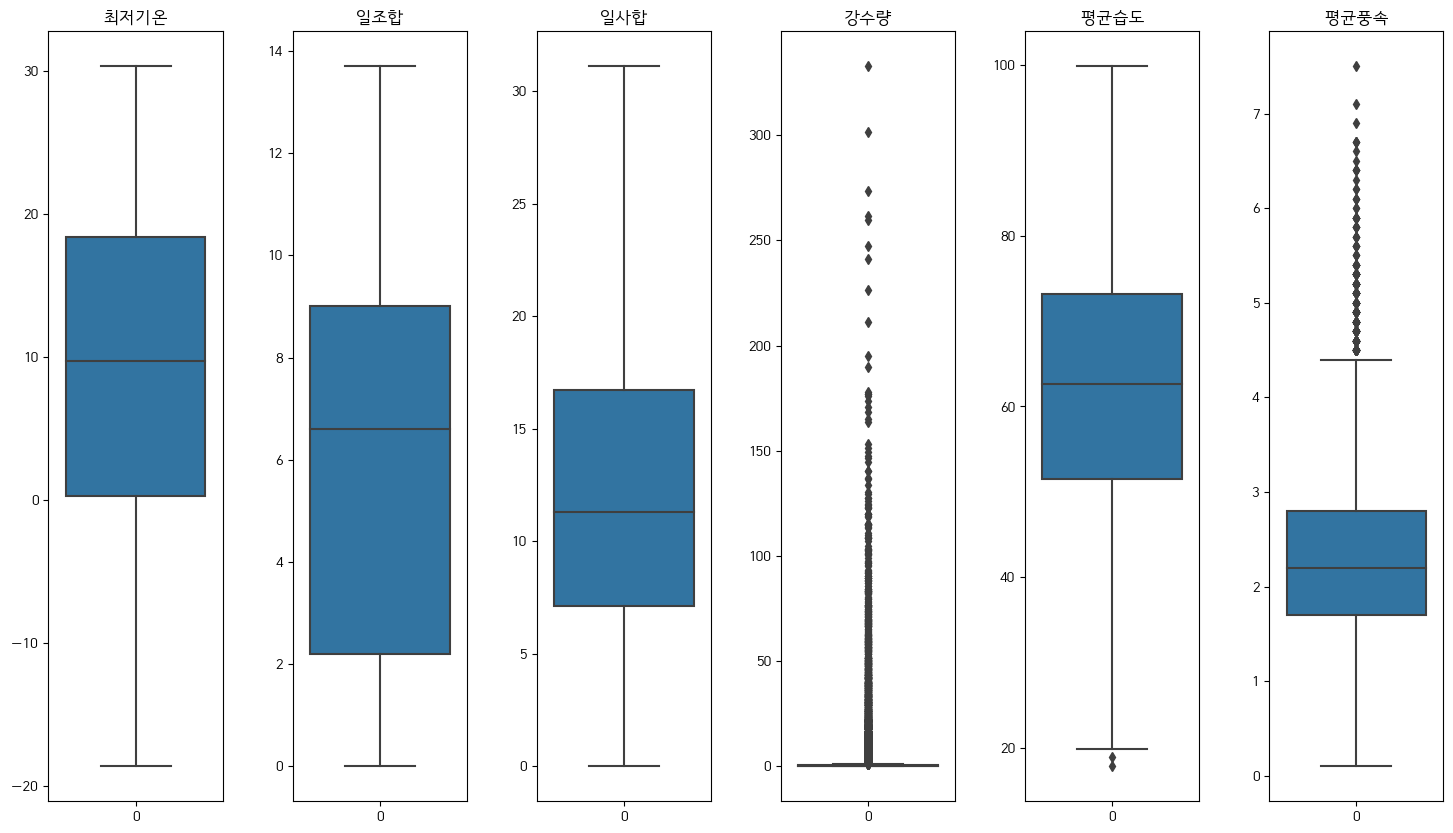

In [42]:
fig, axes = plt.subplots(1, 6, figsize=(18, 10))
axes[0].set_title("최저기온")
axes[1].set_title("일조합")
axes[2].set_title("일사합")
axes[3].set_title("강수량")
axes[4].set_title("평균습도")
axes[5].set_title("평균풍속")
sns.boxplot(train['최저기온'], ax=axes[0])
sns.boxplot(train['일조합'], ax=axes[1])
sns.boxplot(train['일사합'], ax=axes[2])
sns.boxplot(train['강수량'], ax=axes[3])
sns.boxplot(train['평균습도'], ax=axes[4])
sns.boxplot(train['평균풍속'], ax=axes[5])

plt.subplots_adjust(wspace=0.4)

plt.show()

## Z score 확인을 통한 이상치 처리

In [233]:
def outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col])>z].index

In [234]:
train.loc[outlier(train, '평균풍속',1.5)]

,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
일시,,,,,,,,,,
1989-01-08,9.8,6.7,3.1,2.7,81.3,4.0,0.0,2.39,0.0,8.3
1989-01-11,6.6,0.7,5.9,12.8,89.3,4.5,0.0,1.46,0.0,3.0
1989-01-27,-4.8,-9.5,4.7,0.0,47.8,5.0,5.5,7.57,53.9,-7.7
1989-02-01,1.4,-6.0,7.4,0,38.5,4.3,9.1,11.86,88.3,-2.7
1989-02-10,3.2,-4.4,7.6,0,40.0,3.7,9.2,13.31,86.8,-1.1
...,...,...,...,...,...,...,...,...,...,...
2022-09-14,27.9,22.7,5.2,0.0,56.9,4.6,1.1,10.09,8.8,24.6
2022-10-10,11.9,8.2,3.7,0.0,72.9,3.8,2.3,9.31,20.0,9.9
2022-11-30,-1.6,-8.1,6.5,0,49.1,3.9,9.1,12.17,92.9,-5.4


## IQR을 기반 이상치 제거
- 제1사분위수 = Q1(25%)
- 제3사분위수 = Q3(75%)
- IQR = Q3 - Q1
 * IQR 범위 값 구하기
 	Q1 - 1.5 * IQR <= values <= Q3 + 1.5 * IQR
    ☞ 해당 범위 안에 있는 값만 보존

In [143]:
Q1 = train[['평균습도','일사합', '일조율','최고기온', '최저기온']].quantile(q=0.25)
Q3 = train[['평균습도', '일사합', '일조율', '최고기온', '최저기온']].quantile(q=0.75)

print(Q1, Q3)
IQR = Q3 - Q1

IQR_df = train[(train['평균습도'] <= Q3['평균습도'] + 1.5 * IQR['평균습도']) & (train['평균습도'] >= Q1['평균습도'] - 1.5 * IQR['평균습도'])]
IQR_df = IQR_df[(IQR_df['일사합'] <= Q3['일사합'] + 1.5 * IQR['일사합']) & (IQR_df['일사합'] >= Q1['일사합'] - 1.5 * IQR['일사합'])]
IQR_df = IQR_df[(IQR_df['일조율'] <= Q3['일조율'] + 1.5 * IQR['일조율']) & (IQR_df['일조율'] >= Q1['일조율'] - 1.5 * IQR['일조율'])]
IQR_df = IQR_df[(IQR_df['최저기온'] <= Q3['최저기온'] + 1.5 * IQR['최저기온']) & (IQR_df['최저기온'] >= Q1['최저기온'] - 1.5 * IQR['최저기온'])]


평균습도    51.50
일사합      7.11
일조율     17.70
최고기온     8.40
최저기온     0.30
Name: 0.25, dtype: float64 평균습도    73.1000
일사합     16.7375
일조율     78.9000
최고기온    26.7000
최저기온    18.4000
Name: 0.75, dtype: float64


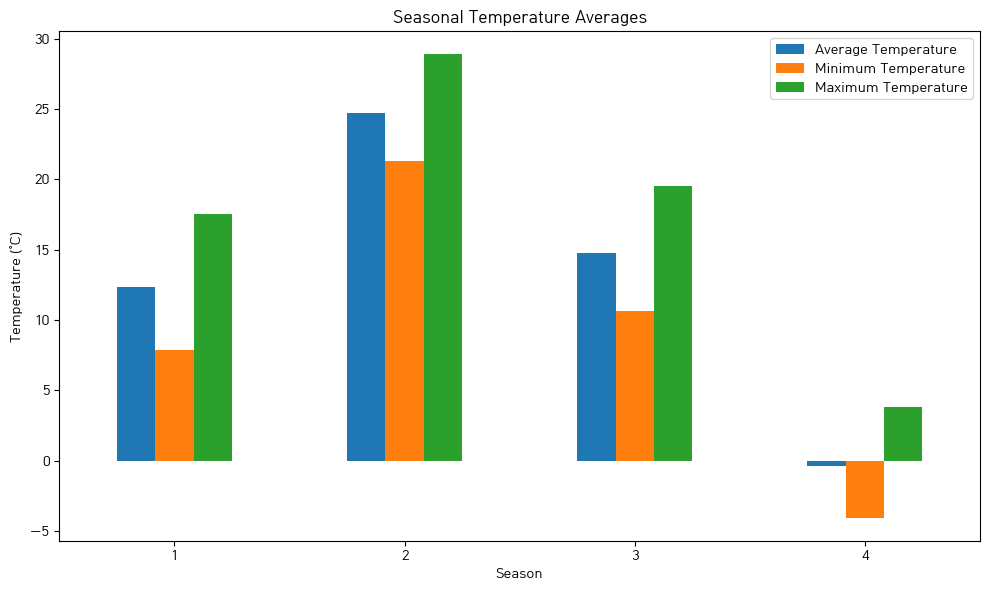

,평균기온,최저기온,최고기온
계절숫자,,,
1,12.374488,7.852302,17.574488
2,24.729923,21.342525,28.883600
3,14.770265,10.654331,19.516970
4,-0.369459,-4.050391,3.791167


In [204]:
seasonal_averages = train.groupby('계절숫자').agg({'평균기온': 'mean', '최저기온': 'mean', '최고기온': 'mean'})

# 막대 그래프로 시각화
seasonal_averages.plot(kind='bar', figsize=(10, 6))

plt.title('Seasonal Temperature Averages')
plt.xlabel('Season')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=0)
plt.legend(['Average Temperature', 'Minimum Temperature', 'Maximum Temperature'])
plt.tight_layout()
plt.show()

# 계절별 평균 온도 데이터 확인
seasonal_averages

In [205]:
train = train.drop(columns=['최고기온'])
train = train.drop(columns=['일교차'])

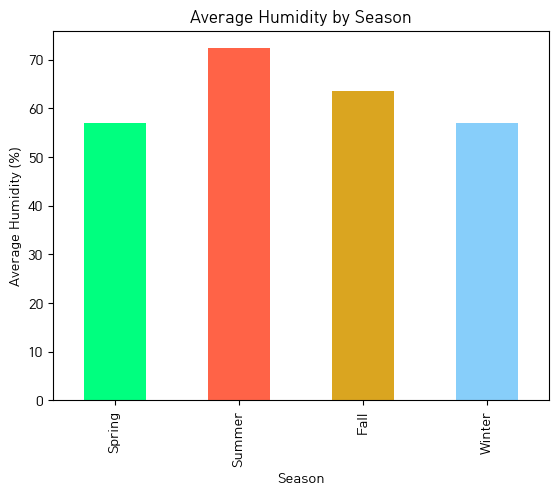

In [206]:
seasonal_humidity_means = train.groupby('계절숫자')['평균습도'].mean()

# 막대 그래프로 시각화
seasonal_humidity_means.plot(kind='bar', color=['springgreen', 'tomato', 'goldenrod', 'lightskyblue'])
plt.title('Average Humidity by Season')
plt.xlabel('Season')
plt.ylabel('Average Humidity (%)')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

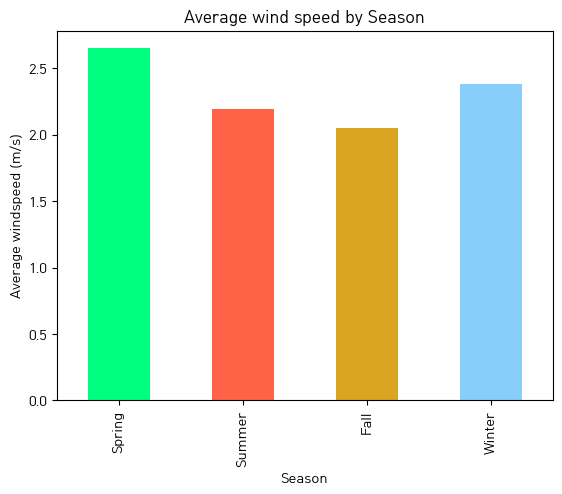

In [207]:
seasonal_humidity_means = train.groupby('계절숫자')['평균풍속'].mean()

# 막대 그래프로 시각화
seasonal_humidity_means.plot(kind='bar', color=['springgreen', 'tomato', 'goldenrod', 'lightskyblue'])
plt.title('Average wind speed by Season')
plt.xlabel('Season')
plt.ylabel('Average windspeed (m/s)')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

In [208]:
train['강수량'] = pd.to_numeric(train['강수량'], errors='coerce')

# 결측치를 0으로 대체
train['강수량'].fillna(0, inplace=True)

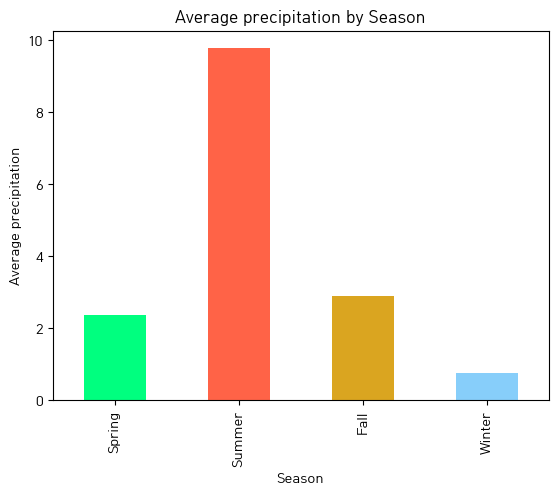

In [209]:
seasonal_humidity_means = train.groupby('계절숫자')['강수량'].mean()

# 막대 그래프로 시각화
seasonal_humidity_means.plot(kind='bar', color=['springgreen', 'tomato', 'goldenrod', 'lightskyblue'])
plt.title('Average precipitation by Season')
plt.xlabel('Season')
plt.ylabel('Average precipitation')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

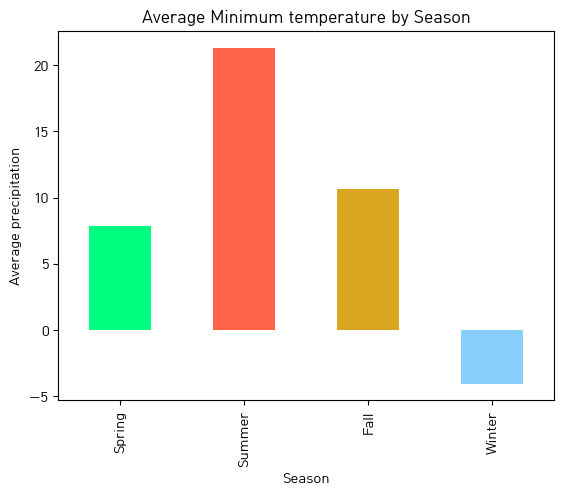

In [142]:
seasonal_humidity_means = train.groupby('계절숫자')['최저기온'].mean()

# 막대 그래프로 시각화
seasonal_humidity_means.plot(kind='bar', color=['springgreen', 'tomato', 'goldenrod', 'lightskyblue'])
plt.title('Average Minimum temperature by Season')
plt.xlabel('Season')
plt.ylabel('Average precipitation')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

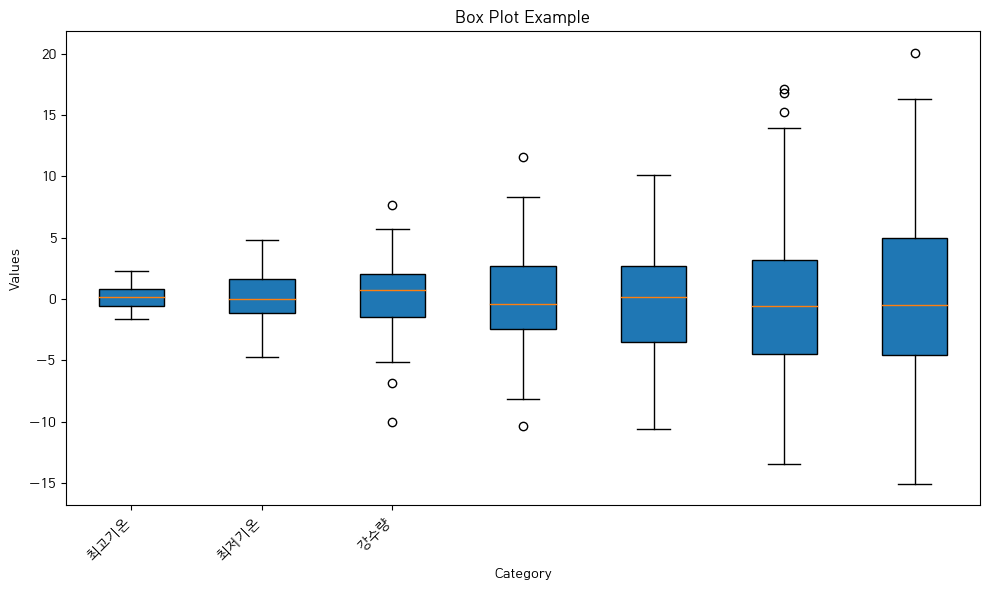

In [190]:
plt.figure(figsize=(10,6))
data_to_plot = [np.random.normal(0, std, 100) for std in range(1, 8)]
plt.boxplot(data_to_plot, patch_artist=True)

# 그래프 제목 및 축 레이블 설정
plt.title('Box Plot Example')
plt.xlabel('Category')
plt.ylabel('Values')

# 축 눈금 레이블 설정 (카테고리 이름을 한국어로 지정)
categories = ['최고기온', '최저기온', '강수량']
plt.xticks(np.arange(1, len(categories) + 1), categories, rotation=45, ha='right')

# 박스 플롯 표시
plt.tight_layout()
plt.show()

In [191]:
#pip install prophet

Note: you may need to restart the kernel to use updated packages.


## Prophet 모델

In [143]:
import prophet
from prophet import Prophet
from sklearn.metrics import mean_absolute_error

In [144]:
train = train.reset_index()
train = train.rename(columns={'일시': 'ds', '평균기온': 'y'})

In [145]:
train_size = int(0.8 * len(train))
val_size = int(0.1 * len(train))
test_size = len(train) - train_size - val_size

train_data = train[:train_size]
val_data = train[train_size:train_size+val_size]
test_data = train[train_size+val_size:]

In [148]:
prophet = Prophet(changepoint_prior_scale=0.05,
                  daily_seasonality=True,
                  seasonality_mode = 'additive',
                  seasonality_prior_scale = 10)
prophet.fit(train_data)

20:29:53 - cmdstanpy - INFO - Chain [1] start processing
20:29:55 - cmdstanpy - INFO - Chain [1] done processing


C:\Users\H\anaconda3\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\H\anaconda3\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validatio

Mean Squared Error on Validation Data: 11.43696981618574


C:\Users\H\anaconda3\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\H\anaconda3\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validatio

Mean Squared Error on Test Data: 16.35755554066981


<Figure size 800x300 with 0 Axes>

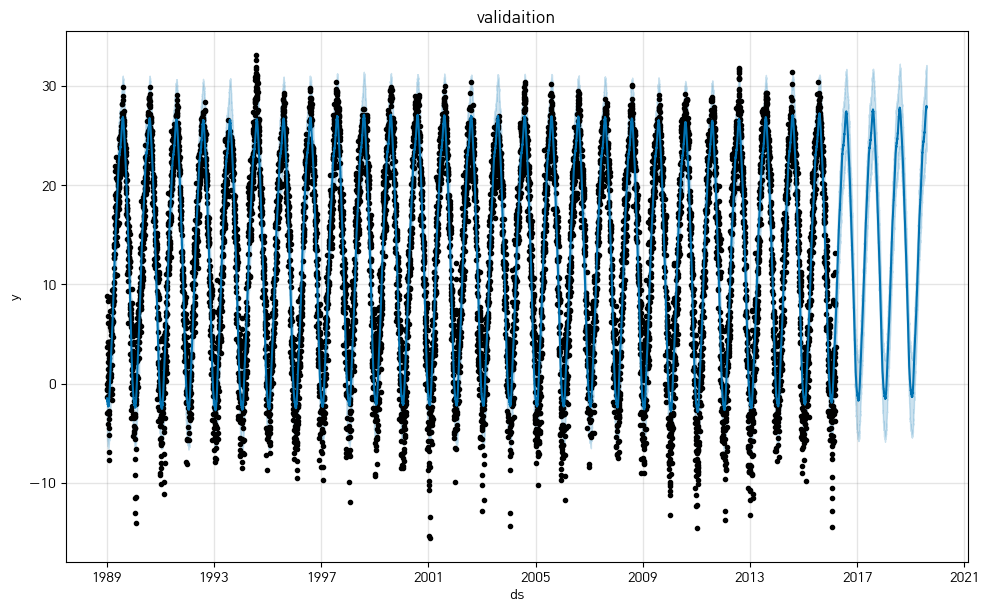

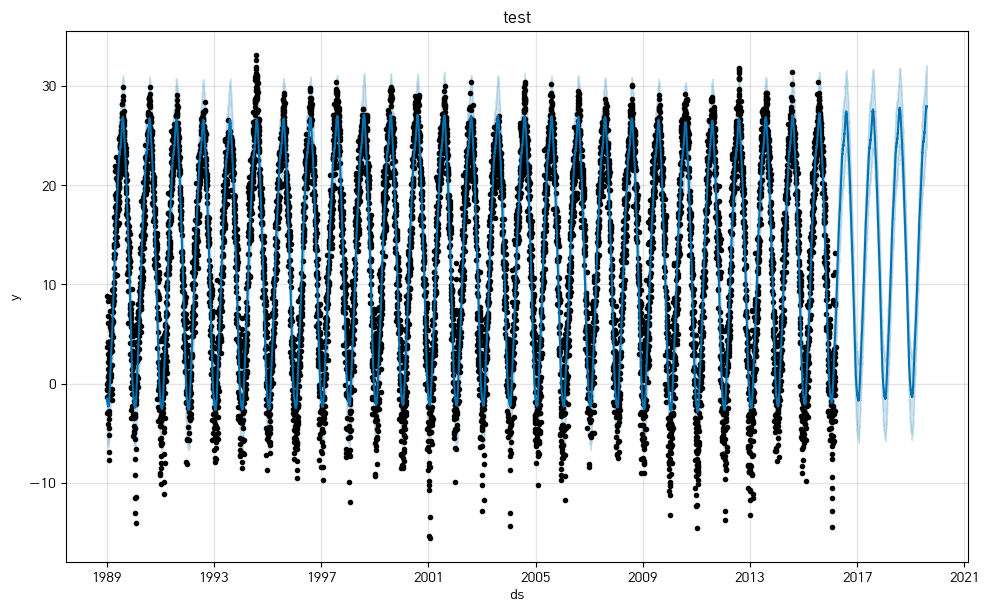

In [149]:
plt.figure(figsize = (8, 3))

# validation 데이터를 사용하여 모델 예측(optional)
future_val = prophet.make_future_dataframe(periods = val_size)
forecast_val = prophet.predict(future_val)

# 검증 데이터와 예측값 비교
fig = prophet.plot(forecast_val)
plt.title('validaition')

# 검증 데이터에 대한 평가 지표 계산 (예: 평균제곱오차)
mae = mean_absolute_error(val_data['y'], forecast_val['yhat'][:val_size])
print(f'Mean Squared Error on Validation Data: {mae}')

# test 데이터를 사용하여 최종 예측 수행
future_test = prophet.make_future_dataframe(periods=test_size)
forecast_test = prophet.predict(future_test)

# test 데이터와 예측값 비교
fig = prophet.plot(forecast_test)
plt.title('test')

# test 데이터에 대한 평가 지표 계산D
mae_test = mean_absolute_error(test_data['y'], forecast_test['yhat'][-test_size:])
print(f'Mean Squared Error on Test Data: {mae_test}')

In [150]:
future_data = prophet.make_future_dataframe(periods = 358, freq = 'd') #periods는 예측할 기간
forecast_data = prophet.predict(future_data)
forecast_data[['ds','yhat']].tail()

,ds,yhat
10287,2017-03-02,4.269875
10288,2017-03-03,4.424530
10289,2017-03-04,4.646512
10290,2017-03-05,4.791647
10291,2017-03-06,4.934622


## 여기서 생성되는 파일로 제출 가능

In [151]:
submission_data = pd.read_csv('C:/Users/H/Desktop/평균기온예측/sample_submission.csv')

submission_data['평균기온'] = forecast_data.yhat[-358:].values
submission_data.tail()

#결과 저장
submission_data.to_csv("submission_prophet_final2.csv", index=False)

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [76]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 4.2 MB/s eta 0:00:24
   ---------------------------------------- 0.8/99.8 MB 10.1 MB/s eta 0:00:10
    --------------------------------------- 1.9/99.8 MB 14.7 MB/s eta 0:00:07
   - -------------------------------------- 3.7/99.8 MB 21.4 MB/s eta 0:00:05
   - -------------------------------------- 4.7/99.8 MB 21.4 MB/s eta 0:00:05
   -- ------------------------------------- 6.0/99.8 MB 22.7 MB/s eta 0:00:05
   -- ------------------------------------- 7.3/99.8 MB 26.0 MB/s eta 0:00:04
   -- ------------------------------------- 7.3/99.8 MB 26.0 MB/s eta 0:00:04
   -- ------------------------------------- 7.3/99.8 MB 26.0 MB/s eta 0:00:04
   --- -----------------

In [145]:
train

,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온,계절숫자
일시,,,,,,,,,,,
1989-01-01,3.5,-3.4,6.9,0.0,64.5,2.1,7.8,8.57,81.3,-0.6,4
1989-01-02,2.9,-4.0,6.9,0.0,83.8,1.6,0.0,1.82,0.0,-0.5,4
1989-01-03,2.9,-4.1,7.0,0.0,61.8,3.0,7.7,7.89,80.2,0.0,4
1989-01-04,1.5,-7.2,8.7,0.0,45.0,1.5,8.1,7.17,83.5,-2.9,4
1989-01-05,6.3,-7.6,13.9,0.0,43.5,1.3,7.3,8.00,75.3,-1.3,4
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,3.3,-7.3,10.6,0.0,69.8,1.8,8.8,10.25,91.7,-2.6,4
2022-12-28,0.1,-6.0,6.1,0.1,58.1,2.5,8.7,10.86,90.6,-3.3,4
2022-12-29,2.1,-7.8,9.9,0.0,56.3,1.7,9.0,10.88,93.8,-2.9,4


In [59]:
test

,?쇱떆,?됯퇏湲곗삩
0,2023-01-01,-0.460430
1,2023-01-02,-0.853070
2,2023-01-03,-0.056744
3,2023-01-04,-2.580304
4,2023-01-05,-2.382146
...,...,...
353,2023-12-20,3.495493
354,2023-12-21,2.331794
355,2023-12-22,0.872139
356,2023-12-23,-0.063395


In [60]:
x = train.drop(columns=['평균기온'])
y = train['평균기온']
x_test = test['?쇱떆']
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)
standard_scaler = StandardScaler()
x_standard = standard_scaler.fit_transform(x)

C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(ar

In [241]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 모델 구성
model = Sequential([
    Dense(128, activation='relu', input_shape=(x_standard.shape[1],)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)  # 출력 레이어
])

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 학습
model.fit(x_standard, y, epochs=100, batch_size=32)

model.save('my_model5.h5')  # H5 파일 형식으로 저장

Epoch 1/100
389/389 [==============================] - 1s 2ms/step - loss: 16.5863
Epoch 2/100
389/389 [==============================] - 1s 2ms/step - loss: 1.2087
Epoch 3/100
389/389 [==============================] - 1s 2ms/step - loss: 1.1193
Epoch 4/100
389/389 [==============================] - 1s 2ms/step - loss: 1.0805
Epoch 5/100
389/389 [==============================] - 1s 2ms/step - loss: 1.0956
Epoch 6/100
389/389 [==============================] - 1s 2ms/step - loss: 1.0477
Epoch 7/100
389/389 [==============================] - 1s 2ms/step - loss: 1.0307
Epoch 8/100
389/389 [==============================] - 1s 2ms/step - loss: 1.0519
Epoch 9/100
389/389 [==============================] - 1s 2ms/step - loss: 0.9804
Epoch 10/100
389/389 [==============================] - 1s 2ms/step - loss: 0.9849
Epoch 11/100
389/389 [==============================] - 1s 2ms/step - loss: 0.9747
Epoch 12/100
389/389 [==============================] - 1s 2ms/step - loss: 0.9580
Epoch 13/100

In [148]:
test

,?쇱떆,?됯퇏湲곗삩
0,2023-01-01,-0.460430
1,2023-01-02,-0.853070
2,2023-01-03,-0.056744
3,2023-01-04,-2.580304
4,2023-01-05,-2.382146
...,...,...
353,2023-12-20,3.495493
354,2023-12-21,2.331794
355,2023-12-22,0.872139
356,2023-12-23,-0.063395


In [246]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 2023년 1월 1일부터 358일 동안의 날짜 데이터 생성
dates_2023 = pd.date_range(start='2023-01-01', periods=358, freq='D')
future_df = pd.DataFrame({'ds': dates_2023})

# 연, 월, 일로 분리 (모델 학습에 사용된 특성에 맞게 조정)
future_df['year'] = future_df['ds'].dt.year
future_df['month'] = future_df['ds'].dt.month
future_df['day'] = future_df['ds'].dt.day

# 필요한 특성 선택 (여기서는 예시로 연, 월, 일을 사용)
X_future = future_df[['year', 'month', 'day']]

# 표준화 (훈련 데이터에 사용된 StandardScaler 인스턴스를 재사용)
standard_scaler = StandardScaler().fit(X_future)  # 실제 사용 시, 훈련 데이터에 fit된 scaler 사용
X_future_standard = standard_scaler.transform(X_future)


C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(ar

In [245]:
import tensorflow as tf

# 저장된 모델 불러오기
loaded_model = tf.keras.models.load_model('my_model5.h5')

# 예측 수행
predicted_temperatures_2023 = loaded_model.predict(X_future_standard)


ValueError: in user code:

    File "C:\Users\H\anaconda3\lib\site-packages\keras\engine\training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\H\anaconda3\lib\site-packages\keras\engine\training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\H\anaconda3\lib\site-packages\keras\engine\training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\H\anaconda3\lib\site-packages\keras\engine\training.py", line 2111, in predict_step
        return self(x, training=False)
    File "C:\Users\H\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\H\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 8), found shape=(None, 3)


In [ ]:
submission_data = pd.read_csv('C:/Users/H/Desktop/평균기온예측/sample_submission.csv')

submission_data['평균기온'] = forecast_data.yhat[-358:].values
submission_data.tail()

#결과 저장
submission_data.to_csv("submission_deeplearning_final2.csv", index=False)

In [254]:
test

,일시,평균기온
0,2023-01-01,0
1,2023-01-02,0
2,2023-01-03,0
3,2023-01-04,0
4,2023-01-05,0
...,...,...
353,2023-12-20,0
354,2023-12-21,0
355,2023-12-22,0
356,2023-12-23,0


In [255]:
# 평균기온 열에 예측된 값 채우기
test['평균기온'] = predicted_temperatures_2023.flatten()[:358]


In [256]:
test

,일시,평균기온
0,2023-01-01,-0.460430
1,2023-01-02,-0.853070
2,2023-01-03,-0.056744
3,2023-01-04,-2.580304
4,2023-01-05,-2.382146
...,...,...
353,2023-12-20,3.495493
354,2023-12-21,2.331794
355,2023-12-22,0.872139
356,2023-12-23,-0.063395


In [257]:
# 변경된 데이터프레임을 CSV 파일로 저장
test.to_csv('C:/Users/H/Desktop/평균기온예측/updated_sample_submission.csv', index=False)


In [250]:
# 예측 결과 확인
print(len(predicted_temperatures_2023))  # 예측 결과의 길이 확인

# 예측된 기온 데이터프레임 생성
predicted_temperatures_2023_df = pd.DataFrame(predicted_temperatures_2023, columns=['평균 기온'])

# 예측 결과 파일로 저장
predicted_temperatures_2023_df.to_csv('predicted_temperatures_2023.csv', index=False)


12418


In [232]:
predicted_temperatures_2023

array([[-0.46043035],
       [-0.85307014],
       [-0.05674371],
       ...,
       [-2.7488642 ],
       [-0.9487028 ],
       [-0.9731631 ]], dtype=float32)

In [78]:
train

,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온,계절숫자
일시,,,,,,,,,,,
1989-01-01,3.5,-3.4,6.9,0.0,64.5,2.1,7.8,8.57,81.3,-0.6,4
1989-01-02,2.9,-4.0,6.9,0.0,83.8,1.6,0.0,1.82,0.0,-0.5,4
1989-01-03,2.9,-4.1,7.0,0.0,61.8,3.0,7.7,7.89,80.2,0.0,4
1989-01-04,1.5,-7.2,8.7,0.0,45.0,1.5,8.1,7.17,83.5,-2.9,4
1989-01-05,6.3,-7.6,13.9,0.0,43.5,1.3,7.3,8.00,75.3,-1.3,4
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,3.3,-7.3,10.6,0.0,69.8,1.8,8.8,10.25,91.7,-2.6,4
2022-12-28,0.1,-6.0,6.1,0.1,58.1,2.5,8.7,10.86,90.6,-3.3,4
2022-12-29,2.1,-7.8,9.9,0.0,56.3,1.7,9.0,10.88,93.8,-2.9,4


In [108]:
test

,?쇱떆,?됯퇏湲곗삩
0,2023-01-01,-0.460430
1,2023-01-02,-0.853070
2,2023-01-03,-0.056744
3,2023-01-04,-2.580304
4,2023-01-05,-2.382146
...,...,...
353,2023-12-20,3.495493
354,2023-12-21,2.331794
355,2023-12-22,0.872139
356,2023-12-23,-0.063395


## XGboost

In [61]:
x = train.drop(columns=['평균기온'])
y = train['평균기온']
x_test = test['?쇱떆']
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)
standard_scaler = StandardScaler()
x_standard = standard_scaler.fit_transform(x)

C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(ar

In [106]:
test

,?쇱떆,?됯퇏湲곗삩
0,2023-01-01,-3.060918
1,2023-01-02,-3.207079
2,2023-01-03,-3.570970
3,2023-01-04,1.049066
4,2023-01-05,3.955889
...,...,...
353,2023-12-20,-5.909144
354,2023-12-21,-5.229661
355,2023-12-22,-0.861666
356,2023-12-23,3.375731


In [157]:
pip install optuna

  Obtaining dependency information for optuna from https://files.pythonhosted.org/packages/4c/6a/219a431aaf81b3eb3070fd2d58116baa366d3072f43bbcc87dc3495b7546/optuna-3.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for alembic>=1.5.0 from https://files.pythonhosted.org/packages/7f/50/9fb3a5c80df6eb6516693270621676980acd6d5a9a7efdbfa273f8d616c7/alembic-1.13.1-py3-none-any.whl.metadata
  Obtaining dependency information for colorlog from https://files.pythonhosted.org/packages/f3/18/3e867ab37a24fdf073c1617b9c7830e06ec270b1ea4694a624038fc40a03/colorlog-6.8.2-py3-none-any.whl.metadata
  Obtaining dependency information for Mako from https://files.pythonhosted.org/packages/2b/8d/9f11d0b9ac521febb806e7f30dc5982d0f4f5821217712c59005fbc5c1e3/Mako-1.3.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/413.4 kB ? eta -:--:--
   --------------------------------------  409.6/413.4 kB 12.9 MB/s eta 0:00:01
   ---------------------------------------- 413.4/4

In [63]:
import optuna

In [64]:
X = train.drop(columns=['평균기온'])
y = train['평균기온']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 150),
        'subsample': trial.suggest_uniform('subsample', 0.7, 0.9),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 0.7),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.03),
    }

    model = XGBRegressor(**params, random_state=42)
    model.fit(X_train, y_train)

    pred = model.predict(X_valid)
    mae = mean_absolute_error(y_valid, pred)

    return mae

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

print(study.best_params)

[I 2024-02-15 22:11:24,480] A new study created in memory with name: no-name-5a83d1dc-ac42-4703-bb69-2f89a99c8b93
C:\Users\H\AppData\Local\Temp\ipykernel_8272\2905700802.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 0.9),
C:\Users\H\AppData\Local\Temp\ipykernel_8272\2905700802.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 0.7),
C:\Users\H\AppData\Local\Temp\ipykernel_8272\2905700802.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/op

C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
[I 2024-02-15 22:11:25,684] Trial 4 finished with value: 1.2148727143105444 and parameters: {'n_estimators': 137, 'subsample': 0.8624800680045799, 'colsample_bytree': 0.596737409364665, 'learning_rate': 0.016786684317056683}. Best is trial 2 with value: 0.6910733394235543.
C:\Users\H\AppData\Local\Temp\ipykernel_8272\2905700802.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use 

C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
[I 2024-02-15 22:11:26,897] Trial 9 finished with value: 1.1716214373186513 and parameters: {'n_estimators': 132, 'subsample': 0.8908165334834575, 'colsample_bytree': 0.6207996762851182, 'learning_rate': 0.01649521186485777}. Best is trial 7 with value: 0.4358148295779362.
C:\Users\H\AppData\Local\Temp\ipykernel_8272\2905700802.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use 

C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
[I 2024-02-15 22:11:28,597] Trial 14 finished with value: 0.45215292729525874 and parameters: {'n_estimators': 150, 'subsample': 0.7724046082700494, 'colsample_bytree': 0.6987520560710747, 'learning_rate': 0.026216226978536157}. Best is trial 11 with value: 0.414301231380113.
C:\Users\H\AppData\Local\Temp\ipykernel_8272\2905700802.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. U

C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
[I 2024-02-15 22:11:30,037] Trial 19 finished with value: 0.4941247491945049 and parameters: {'n_estimators': 133, 'subsample': 0.7674937646322992, 'colsample_bytree': 0.6738335201342126, 'learning_rate': 0.026928491417365422}. Best is trial 11 with value: 0.414301231380113.
C:\Users\H\AppData\Local\Temp\ipykernel_8272\2905700802.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Us

C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
[I 2024-02-15 22:11:31,546] Trial 24 finished with value: 0.4219708729193797 and parameters: {'n_estimators': 145, 'subsample': 0.7563184293604593, 'colsample_bytree': 0.6092323574535196, 'learning_rate': 0.029783128838142412}. Best is trial 11 with value: 0.414301231380113.
C:\Users\H\AppData\Local\Temp\ipykernel_8272\2905700802.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Us

C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
[I 2024-02-15 22:11:32,824] Trial 29 finished with value: 0.5442639664028676 and parameters: {'n_estimators': 150, 'subsample': 0.7857453481123731, 'colsample_bytree': 0.6040883780227598, 'learning_rate': 0.022239576567399246}. Best is trial 11 with value: 0.414301231380113.
C:\Users\H\AppData\Local\Temp\ipykernel_8272\2905700802.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Us

C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
[I 2024-02-15 22:11:34,292] Trial 34 finished with value: 0.4252765109818499 and parameters: {'n_estimators': 143, 'subsample': 0.7950511908081433, 'colsample_bytree': 0.630106913173539, 'learning_rate': 0.029960693270772023}. Best is trial 11 with value: 0.414301231380113.
C:\Users\H\AppData\Local\Temp\ipykernel_8272\2905700802.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use

C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
[I 2024-02-15 22:11:35,924] Trial 39 finished with value: 0.7776299104223403 and parameters: {'n_estimators': 143, 'subsample': 0.7825092298312863, 'colsample_bytree': 0.6087389380665922, 'learning_rate': 0.01897830811112382}. Best is trial 11 with value: 0.414301231380113.
C:\Users\H\AppData\Local\Temp\ipykernel_8272\2905700802.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use

C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
[I 2024-02-15 22:11:37,300] Trial 44 finished with value: 0.44072575718228185 and parameters: {'n_estimators': 144, 'subsample': 0.8051964581040081, 'colsample_bytree': 0.6612088316291516, 'learning_rate': 0.028255223539466613}. Best is trial 11 with value: 0.414301231380113.
C:\Users\H\AppData\Local\Temp\ipykernel_8272\2905700802.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. U

C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
[I 2024-02-15 22:11:38,680] Trial 49 finished with value: 0.4243817486160014 and parameters: {'n_estimators': 148, 'subsample': 0.7912827640584585, 'colsample_bytree': 0.6165966848980097, 'learning_rate': 0.029191734916918316}. Best is trial 11 with value: 0.414301231380113.
C:\Users\H\AppData\Local\Temp\ipykernel_8272\2905700802.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Us

C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
[I 2024-02-15 22:11:40,149] Trial 54 finished with value: 0.42232531515010296 and parameters: {'n_estimators': 150, 'subsample': 0.8144338015906202, 'colsample_bytree': 0.6459369451389131, 'learning_rate': 0.029047793547768985}. Best is trial 11 with value: 0.414301231380113.
C:\Users\H\AppData\Local\Temp\ipykernel_8272\2905700802.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. U

C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
[I 2024-02-15 22:11:41,574] Trial 59 finished with value: 0.4688983828254299 and parameters: {'n_estimators': 144, 'subsample': 0.8097638707813369, 'colsample_bytree': 0.6212238759324332, 'learning_rate': 0.026230802694931037}. Best is trial 11 with value: 0.414301231380113.
C:\Users\H\AppData\Local\Temp\ipykernel_8272\2905700802.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Us

C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
[I 2024-02-15 22:11:42,985] Trial 64 finished with value: 0.4164032251732034 and parameters: {'n_estimators': 149, 'subsample': 0.769031158632708, 'colsample_bytree': 0.6359846633210485, 'learning_rate': 0.029971149751355945}. Best is trial 11 with value: 0.414301231380113.
C:\Users\H\AppData\Local\Temp\ipykernel_8272\2905700802.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use

C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
[I 2024-02-15 22:11:44,443] Trial 69 finished with value: 0.46427067355936236 and parameters: {'n_estimators': 130, 'subsample': 0.7760961281750698, 'colsample_bytree': 0.6565328758642828, 'learning_rate': 0.029276105785491353}. Best is trial 11 with value: 0.414301231380113.
C:\Users\H\AppData\Local\Temp\ipykernel_8272\2905700802.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. U

C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
[I 2024-02-15 22:11:45,928] Trial 74 finished with value: 0.42638301572539333 and parameters: {'n_estimators': 149, 'subsample': 0.7819742787711579, 'colsample_bytree': 0.6352621330991406, 'learning_rate': 0.02869535199964417}. Best is trial 11 with value: 0.414301231380113.
C:\Users\H\AppData\Local\Temp\ipykernel_8272\2905700802.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Us

C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
[I 2024-02-15 22:11:47,498] Trial 79 finished with value: 0.610308676777627 and parameters: {'n_estimators': 107, 'subsample': 0.8034809749591268, 'colsample_bytree': 0.6512056346945784, 'learning_rate': 0.02884788296003282}. Best is trial 11 with value: 0.414301231380113.
C:\Users\H\AppData\Local\Temp\ipykernel_8272\2905700802.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use 

C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
[I 2024-02-15 22:11:49,151] Trial 84 finished with value: 0.42380083429510257 and parameters: {'n_estimators': 146, 'subsample': 0.7785146099543132, 'colsample_bytree': 0.6540198045352871, 'learning_rate': 0.02955238457784381}. Best is trial 11 with value: 0.414301231380113.
C:\Users\H\AppData\Local\Temp\ipykernel_8272\2905700802.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Us

C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
[I 2024-02-15 22:11:50,784] Trial 89 finished with value: 0.437212543397462 and parameters: {'n_estimators': 142, 'subsample': 0.8026432383936487, 'colsample_bytree': 0.666958879653176, 'learning_rate': 0.028857737986757708}. Best is trial 11 with value: 0.414301231380113.
C:\Users\H\AppData\Local\Temp\ipykernel_8272\2905700802.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use 

C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
[I 2024-02-15 22:11:52,366] Trial 94 finished with value: 0.4315233363874058 and parameters: {'n_estimators': 147, 'subsample': 0.7932919731206279, 'colsample_bytree': 0.6390894461313801, 'learning_rate': 0.02841445549334899}. Best is trial 11 with value: 0.414301231380113.
C:\Users\H\AppData\Local\Temp\ipykernel_8272\2905700802.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use

C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
[I 2024-02-15 22:11:53,864] Trial 99 finished with value: 0.4175389538557328 and parameters: {'n_estimators': 150, 'subsample': 0.7971783782583546, 'colsample_bytree': 0.6615299103630697, 'learning_rate': 0.029626360044525353}. Best is trial 11 with value: 0.414301231380113.


{'n_estimators': 150, 'subsample': 0.7898868308467779, 'colsample_bytree': 0.6480964861615315, 'learning_rate': 0.02996166679107202}


In [66]:
X_valid

,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,계절숫자
일시,,,,,,,,,,
1996-06-23,27.1,20.3,6.8,0.0,78.3,1.5,3.5,10.330000,23.6,2
2002-09-12,22.9,16.8,6.1,0.5,83.4,2.0,0.0,1.660000,0.0,3
1996-06-29,24.4,18.7,5.7,30.9,91.3,3.6,0.0,1.100000,0.0,2
2007-12-16,3.7,-3.5,7.2,0.0,62.8,1.5,7.9,8.600000,82.3,4
1992-06-06,25.7,17.1,8.6,0.0,79.0,1.8,2.3,12.310000,15.6,2
...,...,...,...,...,...,...,...,...,...,...
2015-06-04,31.5,17.1,14.4,0.0,28.9,2.6,9.9,14.023867,67.8,2
2011-08-20,27.0,20.3,6.7,0.5,76.9,2.4,1.6,9.820000,11.9,2
1995-10-16,16.5,12.4,4.1,0.0,69.0,2.5,0.9,4.600000,8.0,3


In [67]:
scaler = MinMaxScaler()
cols = train.drop(columns=['평균기온']).columns
train[cols] = scaler.fit_transform(train[cols])
result_df[cols] = scaler.transform(result_df[cols])

C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(ar

NameError: name 'result_df' is not defined

In [74]:
test

,?쇱떆,?됯퇏湲곗삩
0,2023-01-01,-0.460430
1,2023-01-02,-0.853070
2,2023-01-03,-0.056744
3,2023-01-04,-2.580304
4,2023-01-05,-2.382146
...,...,...
353,2023-12-20,3.495493
354,2023-12-21,2.331794
355,2023-12-22,0.872139
356,2023-12-23,-0.063395


In [73]:
non_numeric_columns = train.drop(columns=['평균기온']).select_dtypes(include=['object']).columns

# If there are any non-numeric columns, you need to convert them to numeric or drop them
# Here's a simple way to encode them if needed
for column in non_numeric_columns:
    le = LabelEncoder()
    train[column] = le.fit_transform(train[column])
    test[column] = le.transform(test[column])  # Make sure to transform the test data as well

# Now, fitting the model with the corrected dataset
model = XGBRegressor(n_estimators=150,
                     colsample_bytree=0.650938788194843,
                     learning_rate=0.02997152666801559,
                     subsample=0.8654298963125641)

# Ensure you're dropping only the target column and any non-feature columns correctly
model.fit(train.drop(columns=['평균기온']), train['평균기온'])

# Predicting with the model
pred = model.predict(test.drop(columns=non_numeric_columns))  # Drop the same non-numeric columns from the test set

# Creating a submission DataFrame
sub = pd.DataFrame(pd.date_range(start='2023-01-01', end='2023-12-24', freq='D'), columns=['일시'])
sub['평균기온'] = pred  # Assuming you want to predict '평균기온'
sub.to_csv('Prophet_XGBRegressor_Optuna_231229.csv', index=False, encoding='utf-8')

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:?쇱떆: object

In [76]:
X = train.drop(columns=['평균기온'])
y = train['평균기온']
x_test = test['?됯퇏湲곗삩']
standard_scaler = StandardScaler()
x_standard = standard_scaler.fit_transform(x)

C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(ar

In [79]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from tqdm import tqdm

# 데이터 준비
# x, y, x_test는 이미 정의된 DataFrame이라고 가정합니다.

# KFold 인스턴스 생성
kf = KFold(n_splits=2, shuffle=True)  # 예를 들어, 2개의 fold로 데이터를 분할

accuracy = 0
XGB_highest_mse = 0
for fold_idx, (train_idx, val_idx) in tqdm(enumerate(kf.split(x))):
    x_train = x.iloc[train_idx]
    y_train = y.iloc[train_idx]
    x_val = x.iloc[val_idx]
    y_val = y.iloc[val_idx]

    model = XGBRegressor()
    model.fit(x_train, y_train - 3)
    X_preds = model.predict(x_val)
    mse = mean_squared_error(y_val, X_preds)
    
    accuracy += mse / 2
    if XGB_highest_mse <= mse:
        XGB_highest_mse = mse
        XGB_best_preds = X_preds

print("평균 MSE :", accuracy)
print("가장 낮은 MSE :", XGB_highest_mse)
print("XGB_best_preds :", XGB_best_preds)

XGB_test_preds = model.predict(x_test) + 3
x_test = predicted_temperatures_2023.flatten()[:358]


0it [00:00, ?it/s]C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
1it [00:00,  6.19it/s]C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\H\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or 

평균 MSE : 9.25394692238152
가장 낮은 MSE : 9.270576828494015
XGB_best_preds : [-7.378925  -2.8955333 -6.7548137 ... -6.489389  -4.409453  -4.506798 ]


ValueError: feature_names mismatch: ['최고기온', '최저기온', '일교차', '강수량', '평균습도', '평균풍속', '일조합', '일사합', '일조율', '계절숫자'] ['?됯퇏湲곗삩']
expected 강수량, 평균습도, 일교차, 계절숫자, 최고기온, 일사합, 평균풍속, 최저기온, 일조율, 일조합 in input data
training data did not have the following fields: ?됯퇏湲곗삩

In [80]:
XGB_best_preds

array([-7.378925 , -2.8955333, -6.7548137, ..., -6.489389 , -4.409453 ,
       -4.506798 ], dtype=float32)

In [82]:
x_test = XGB_best_preds.flatten()[:358]

In [84]:
x_test

array([ -7.378925  ,  -2.8955333 ,  -6.7548137 ,  -8.597705  ,
        -6.026975  ,  -2.3775704 ,  -3.2265823 ,  -8.3359785 ,
       -12.162898  ,  -1.6035147 ,   1.1256863 ,  -7.6313663 ,
        -6.390999  ,  -5.015964  ,  -3.0035408 , -10.06798   ,
        -1.0074054 , -10.653531  ,  -9.193702  ,  -8.346448  ,
        -4.7650504 ,  -1.6528252 ,  -0.9129945 ,   4.349366  ,
         6.377045  ,   4.939503  ,  -5.6006694 ,  -7.859158  ,
        -1.0406662 ,  -1.6952709 ,  -2.3862894 ,  -1.556002  ,
        -7.7107615 ,  -4.4718924 ,  -5.726052  ,  -1.9167427 ,
         1.942375  ,  -2.079096  ,  -0.21192989,  -0.41369167,
        -1.4590541 ,   3.179648  ,   3.981374  ,   8.847028  ,
         0.46934643,   2.5277083 ,   4.6027884 ,   2.7953844 ,
         2.3697882 ,   7.199335  ,  12.607484  ,  11.605052  ,
         9.987917  ,   5.687712  ,   7.476624  ,  10.145321  ,
        10.578887  ,  11.328395  ,  10.42098   ,   8.271687  ,
        11.180356  ,   8.929327  ,   9.79923   ,   9.90

In [90]:
print(len(XGB_best_preds))  # 예측 결과의 길이 확인

# # 예측된 기온 데이터프레임 생성
predicted_temperatures_2023_df = pd.DataFrame(XGB_best_preds, columns=['평균 기온'])

# 예측 결과 파일로 저장
predicted_temperatures_2023_df.to_csv('predicted_temperatures_2023.csv', index=False)


6575


In [91]:
test['?됯퇏湲곗삩'] = XGB_best_preds.flatten()[:358]

In [92]:
test

,?쇱떆,?됯퇏湲곗삩
0,2023-01-01,-7.378925
1,2023-01-02,-2.895533
2,2023-01-03,-6.754814
3,2023-01-04,-8.597705
4,2023-01-05,-6.026975
...,...,...
353,2023-12-20,7.634507
354,2023-12-21,0.697819
355,2023-12-22,2.405818
356,2023-12-23,1.368384


In [93]:
test.to_csv('C:/Users/H/Desktop/평균기온예측/updated_sample_submission.csv', index=False)

## LSTM 모델

In [242]:
column_indices = {name: i for i, name in enumerate(train.columns)}

n = len(train)
 
train_data = train[0:int(n*0.7)]
val_data = train[int(n*0.7):int(n*0.9)]
test_data = train[int(n*0.9):]

num_features = train.shape
print(num_features)

(12418, 9)


In [248]:
train_data

,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온,계절숫자
일시,,,,,,,,,,,
1989-01-01,3.5,-3.4,6.9,0,64.5,2.1,7.8,8.57,81.3,-0.6,4
1989-01-02,2.9,-4.0,6.9,0.0,83.8,1.6,0.0,1.82,0.0,-0.5,4
1989-01-03,2.9,-4.1,7.0,0,61.8,3.0,7.7,7.89,80.2,0.0,4
1989-01-04,1.5,-7.2,8.7,0,45.0,1.5,8.1,7.17,83.5,-2.9,4
1989-01-05,6.3,-7.6,13.9,0,43.5,1.3,7.3,8.00,75.3,-1.3,4
...,...,...,...,...,...,...,...,...,...,...,...
2012-10-14,21.8,12.0,9.8,0,39.9,2.6,7.9,13.16,69.9,16.3,3
2012-10-15,21.8,10.3,11.5,0,33.3,1.6,10.5,14.35,92.9,14.8,3
2012-10-16,23.4,10.8,12.6,0,46.5,2.5,8.2,13.08,73.2,17.1,3


In [249]:
train_mean = train_data.mean()
train_std = train_data.std()

train_data = (train_data - train_mean) / train_std
val_data = (val_data - train_mean) / train_std
test_data = (test_data - train_mean) / train_std

TypeError: can only concatenate str (not "float") to str

In [250]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
               train_data=train_data, val_data=val_data, label_columns=None):
    # Store the raw data.
        self.train_data = train_data
        self.val_data = val_data

    # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
            self.column_indices = {name: i for i, name in
                           enumerate(train_data.columns)}

    # Work out the window parameters.
            self.input_width = input_width
            self.label_width = label_width
            self.shift = shift

            self.total_window_size = input_width + shift

            self.input_slice = slice(0, input_width)
            self.input_indices = np.arange(self.total_window_size)[self.input_slice]

            self.label_start = self.total_window_size - self.label_width
            self.labels_slice = slice(self.label_start, None)
            self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [251]:
def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
        labels = tf.stack(
            [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

WindowGenerator.split_window = split_window

In [256]:
def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=True,
        batch_size=32,)

    ds = ds.map(self.split_window)

    return ds

WindowGenerator.make_dataset = make_dataset

In [257]:
@property
def train(self):
    return self.make_dataset(self.train_data)

@property
def val(self):
    return self.make_dataset(self.val_data)

@property
def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
    # No example batch was found, so get one from the `.train` dataset
        result = next(iter(self.train))
    # And cache it for next time
        self._example = result
    return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.example = example

In [258]:
MAX_EPOCHS = 110

def compile_and_fit(model, window, patience=5):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min',
                                                    restore_best_weights=True)

    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
    return history

In [260]:
import tensorflow as tf
OUT_STEPS = 358
INPUT_WIDTH = OUT_STEPS * 3
multi_window = WindowGenerator(input_width=INPUT_WIDTH,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS,
                               label_columns=['평균기온'])

multi_window.train.element_spec

(TensorSpec(shape=(None, 1074, 11), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 358, 1), dtype=tf.float32, name=None))

In [261]:
multi_val_performance = {}
multi_performance = {}

multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.LSTM(128, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, 1])
])

history = compile_and_fit(multi_lstm_model, multi_window)

# IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val, verbose=0)

Epoch 1/110
227/227 [==============================] - 644s 3s/step - loss: 182.2293 - mean_absolute_error: 11.3202 - val_loss: 137.5391 - val_mean_absolute_error: 10.2335
Epoch 2/110
227/227 [==============================] - 719s 3s/step - loss: 108.2935 - mean_absolute_error: 9.1229 - val_loss: 123.5881 - val_mean_absolute_error: 9.7087
Epoch 3/110
227/227 [==============================] - 683s 3s/step - loss: 104.9872 - mean_absolute_error: 8.9668 - val_loss: 122.6452 - val_mean_absolute_error: 9.6423
Epoch 4/110
227/227 [==============================] - 5467s 24s/step - loss: 104.8622 - mean_absolute_error: 8.9477 - val_loss: 122.5236 - val_mean_absolute_error: 9.6309
Epoch 5/110
  4/227 [..............................] - ETA: 12:14 - loss: 106.2954 - mean_absolute_error: 8.9998

KeyboardInterrupt: 